# Python 기반 vLLM 서버 실행

In [1]:
import subprocess
import os

from dotenv import load_dotenv
from sklearn.metrics.pairwise import cosine_similarity

from sentence_transformers import SentenceTransformer
import numpy as np

load_dotenv(dotenv_path=os.path.abspath("/home/a01088415234/1-team-YouTIL-ai/Til/vLLM-server/.env"))
model_path = os.getenv("GEMMA_MODEL_4B_PATH")

# 1. 모델 로딩
model = SentenceTransformer("BAAI/bge-m3", trust_remote_code=True)
model = model.to("cuda")

In [3]:
def start_vllm_server():
    subprocess.Popen([
        "vllm", "serve",
        model_path,
        "--port", "8001",
        "--max-model-len", "4096",
        "--gpu-memory-utilization", "0.95",
        "--max-num-seqs", "50",
        "--max-num-batched-tokens", "4096"
    ])

start_vllm_server()

In [4]:
from openai import OpenAI

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

client = OpenAI(
    base_url="http://localhost:8001/v1",
    api_key=OPENAI_API_KEY,  # 아무 값이나 사용 가능
)

In [5]:
til = """ # 📅 2024-09-22
### 📖 1. 오늘 배운 내용
오늘 학습 내용은 review controller 에서 user token 을 사용하는 방식으로 변경했습니다.  JWT 를 이용하여 사용자 id 를 가져오도록 구현했고, service layer 에서 사용자 id 를 활용해서 리뷰 생성을 진행합니다. 이는 보안 강화를 위해 중요한 부분이라고 생각합니다.

### 📚 2. 개념 정리
* **JWT (JSON Web Token)** : JSON 객체 형태로 데이터를 인코딩하여 안전하게 전송하기 위한 표준 방식입니다. 유효 기간 설정, 서명 등을 통해 위변조 방지 기능을 제공하며, 토큰 자체에 사용자 정보를 담아보낼 수 있습니다.
* **Spring Security**: 자바 기반 웹 애플리케이션에서 보안을 담당하는 프레임워크입니다. 인증, 권한 부여 등의 역할을 수행하며, 다양한 보안 관련 기능을 제공합니다.
* **인증 (Authentication)**: 사용자가 누구인지 확인하는 프로세스입니다.
* **인가 (Authorization)**: 인증된 사용자의 접근 권한을 결정하는 프로세스입니다.

### 🤔 3. 해당 개념이 필요한 이유
사용자 토큰을 이용하면 서버 측에서는 클라이언트로부터 받은 토큰만으로 사용자 정보를 확인할 수 있어, 매 요청마다 데이터베이스 조회 과정을 거치지 않아 성능 향상 효과가 있습니다. 또한, 토큰 기반 인증은 세션 기반 인증보다 확장성이 뛰어나며, 모바일 앱과의 통합에도 용이합니다. 특히, API Gateway를 통한 인증 로직 분리가 가능해져 전체 시스템의 복잡도를 낮출 수 있습니다.

### 💡 4. 개념을 활용하는 방법
1.  클라이언트는 로그인 성공 후 JWT 토큰을 발급받습니다.
2.  토큰은 클라이언트에게 전달됩니다.
3.  서버는 HTTP Header의 Authorization 필드에 있는 토큰을 검증합니다.
4.  유효한 토큰이면 토큰 내부에 저장된 사용자 ID를 추출합니다.
5.  서비스 레이어는 추출된 사용자 ID를 사용하여 리퀘스트 처리합니다.

### 🛠️ 5. 문제 해결 과정
- 기존 컨트롤러에서 직접 사용자 정보를 파라미터로 받던 방식 대신 JWT 토큰을 검증하여 사용자 ID를 얻는 방법을 적용했습니다.
- Spring Security 설정을 업데이트하여 JWT 토큰 검증을 활성화했습니다.
- Service Layer 의 메서드를 수정하여 User Id 를 받아 리뷰를 생성하도록 했습니다.
- JWT 라이브러리를 프로젝트에 추가하고, 토큰 디코딩 및 유효성 검사 코드를 구현했습니다.

### ✍️ 6. 하루 회고
오늘 JWT 토큰 인증을 적용하면서 보안 취약점을 개선하고, 사용자 식별 정보를 보다 효율적으로 관리할 수 있게 되었습니다. 앞으로 더 많은 곳에서 JWT 토큰을 적극적으로 활용하여 시스템의 안정성과 보안 수준을 높일 계획입니다."""

INFO 05-30 06:22:30 [__init__.py:239] Automatically detected platform cuda.
INFO 05-30 06:22:31 [api_server.py:1034] vLLM API server version 0.8.3
INFO 05-30 06:22:31 [api_server.py:1035] args: Namespace(subparser='serve', model_tag='/home/a01088415234/models/gemma-3-4b-it/', config='', host=None, port=8001, uvicorn_log_level='info', disable_uvicorn_access_log=False, allow_credentials=False, allowed_origins=['*'], allowed_methods=['*'], allowed_headers=['*'], api_key=None, lora_modules=None, prompt_adapters=None, chat_template=None, chat_template_content_format='auto', response_role='assistant', ssl_keyfile=None, ssl_certfile=None, ssl_ca_certs=None, enable_ssl_refresh=False, ssl_cert_reqs=0, root_path=None, middleware=[], return_tokens_as_token_ids=False, disable_frontend_multiprocessing=False, enable_request_id_headers=False, enable_auto_tool_choice=False, tool_call_parser=None, tool_parser_plugin='', model='/home/a01088415234/models/gemma-3-4b-it/', task='auto', tokenizer=None, hf_c

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


INFO 05-30 06:23:01 [gpu_model_runner.py:1258] Starting to load model /home/a01088415234/models/gemma-3-4b-it/...
INFO 05-30 06:23:01 [config.py:3334] cudagraph sizes specified by model runner [1, 2, 4, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336, 344, 352, 360, 368, 376, 384, 392, 400, 408, 416, 424, 432, 440, 448, 456, 464, 472, 480, 488, 496, 504, 512] is overridden by config [512, 384, 256, 128, 4, 2, 1, 392, 264, 136, 8, 400, 272, 144, 16, 408, 280, 152, 24, 416, 288, 160, 32, 424, 296, 168, 40, 432, 304, 176, 48, 440, 312, 184, 56, 448, 320, 192, 64, 456, 328, 200, 72, 464, 336, 208, 80, 472, 344, 216, 88, 120, 480, 352, 248, 224, 96, 488, 504, 360, 232, 104, 496, 368, 240, 112, 376]
WARNING 05-30 06:23:01 [topk_topp_sampler.py:69] FlashInfer is not available. Falling back to the PyTorch-native implementation of top-p & top-k samp

Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:  50% Completed | 1/2 [00:00<00:00,  1.04it/s]
Loading safetensors checkpoint shards: 100% Completed | 2/2 [00:02<00:00,  1.22s/it]
Loading safetensors checkpoint shards: 100% Completed | 2/2 [00:02<00:00,  1.18s/it]



INFO 05-30 06:23:04 [loader.py:447] Loading weights took 2.43 seconds
INFO 05-30 06:23:04 [gpu_model_runner.py:1273] Model loading took 8.5833 GiB and 2.698817 seconds
INFO 05-30 06:23:04 [gpu_model_runner.py:1542] Encoder cache will be initialized with a budget of 4096 tokens, and profiled with 16 image items of the maximum feature size.
INFO 05-30 06:23:22 [backends.py:416] Using cache directory: /home/a01088415234/.cache/vllm/torch_compile_cache/7948162d1b/rank_0_0 for vLLM's torch.compile
INFO 05-30 06:23:22 [backends.py:426] Dynamo bytecode transform time: 15.36 s
INFO 05-30 06:23:23 [backends.py:115] Directly load the compiled graph for shape None from the cache
INFO 05-30 06:23:35 [monitor.py:33] torch.compile takes 15.36 s in total
INFO 05-30 06:23:36 [kv_cache_utils.py:578] GPU KV cache size: 57,680 tokens
INFO 05-30 06:23:36 [kv_cache_utils.py:581] Maximum concurrency for 4,096 tokens per request: 14.08x
INFO 05-30 06:24:06 [gpu_model_runner.py:1608] Graph capturing finished 

INFO:     Started server process [163626]
INFO:     Waiting for application startup.
INFO:     Application startup complete.


In [ ]:
from pydantic import BaseModel
from enum import Enum
from typing import List

class keywords(str, Enum):
    keyword1 = "keyword1"
    keyword2 = "keyword2"
    keyword3 = "keyword3"
    keyword4 = "keyword4"
    keyword5 = "keyword5"
    keyword6 = "keyword6"
    keyword7 = "keyword7"
    keyword8 = "keyword8"
    keyword9 = "keyword9"
    keyword10 = "keyword10"


class CarDescription(BaseModel):
    keywords_list: List[str] = []


json_schema = CarDescription.model_json_schema()

response = client.chat.completions.create(
    model=model_path,
    messages=[
        {
            "role": "user",
            "content": f"해당 Til을 참고해서 내용과 관련된 핵심 개념 키워드를 추출해주세요. /n {til}",
        }
    ],
    extra_body={"guided_json": json_schema},
)


print(response.choices[0].message.content)

# response_text = ""
# for chunk in stream:
#     delta = chunk.choices[0].delta
#     if "content" in delta:
#         print(delta["content"])
#         response_text += delta["content"]
        
# # 출력 결과
# print(response_text)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


INFO 05-30 06:24:14 [chat_utils.py:396] Detected the chat template content format to be 'openai'. You can set `--chat-template-content-format` to override this.
INFO 05-30 06:24:14 [logger.py:39] Received request chatcmpl-dd14564361b442cd8dc4ecc7e16cbf06: prompt: '<bos><start_of_turn>user\n해당 Til을 참고해서 내용과 관련된 핵심 개념 키워드를 추출해주세요. /n  # 📅 2024-09-22\n### 📖 1. 오늘 배운 내용\n오늘 학습 내용은 review controller 에서 user token 을 사용하는 방식으로 변경했습니다.  JWT 를 이용하여 사용자 id 를 가져오도록 구현했고, service layer 에서 사용자 id 를 활용해서 리뷰 생성을 진행합니다. 이는 보안 강화를 위해 중요한 부분이라고 생각합니다.\n\n### 📚 2. 개념 정리\n* **JWT (JSON Web Token)** : JSON 객체 형태로 데이터를 인코딩하여 안전하게 전송하기 위한 표준 방식입니다. 유효 기간 설정, 서명 등을 통해 위변조 방지 기능을 제공하며, 토큰 자체에 사용자 정보를 담아보낼 수 있습니다.\n* **Spring Security**: 자바 기반 웹 애플리케이션��서 보안을 담당하는 프레임워크입니다. 인증, 권한 부여 등의 역할을 수행하며, 다양한 보안 관련 기능을 제공합니다.\n* **인증 (Authentication)**: 사용자가 누구인지 확인하는 프로세스입니다.\n* **인가 (Authorization)**: 인증된 사용자의 접근 권한을 결정하는 프로세스입니다.\n\n### 🤔 3. 해당 개념이 필요한 이유\n사용자 토큰을 이용하면 서버 측에서는 클라이언트로부터 받은 토큰만으로 사용자 정보를 확인할 수 있어, 매 요청

/home/a01088415234/myenv/test/lib/python3.10/site-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


INFO:     127.0.0.1:49314 - "POST /v1/chat/completions HTTP/1.1" 200 OK
{
  "keywords_list": [
    "JWT (JSON Web Token)",
    "Spring Security",
    "인증 (Authentication)",
    "인가 (Authorization)",
    "토큰",
    "사용자 ID",
    "API Gateway",
    "보안",
    "세션 기반 인증",
    "토큰 검증",
    "토큰 디코딩"
  ]
}


INFO 05-30 06:24:26 [loggers.py:87] Engine 000: Avg prompt throughput: 65.0 tokens/s, Avg generation throughput: 9.5 tokens/s, Running: 0 reqs, Waiting: 0 reqs, GPU KV cache usage: 0.0%, Prefix cache hit rate: 0.0%


In [8]:
from pydantic import ValidationError

try:
    parsed = CarDescription.parse_raw(response.choices[0].message.content)
    print(parsed)
except ValidationError as e:
    print("❌ JSON 파싱 실패:", e)

parsed.keywords_list

keywords_list=['JWT (JSON Web Token)', 'Spring Security', '인증 (Authentication)', '인가 (Authorization)', '토큰', '사용자 ID', 'API Gateway', '보안', '세션 기반 인증', '토큰 검증', '토큰 디코딩']


/var/tmp/ipykernel_162319/3393043497.py:4: PydanticDeprecatedSince20: The `parse_raw` method is deprecated; if your data is JSON use `model_validate_json`, otherwise load the data then use `model_validate` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  parsed = CarDescription.parse_raw(response.choices[0].message.content)


['JWT (JSON Web Token)',
 'Spring Security',
 '인증 (Authentication)',
 '인가 (Authorization)',
 '토큰',
 '사용자 ID',
 'API Gateway',
 '보안',
 '세션 기반 인증',
 '토큰 검증',
 '토큰 디코딩']

INFO 05-30 06:24:36 [loggers.py:87] Engine 000: Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Waiting: 0 reqs, GPU KV cache usage: 0.0%, Prefix cache hit rate: 0.0%


/var/tmp/ipykernel_162319/1887484165.py:35: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/tmp/ipykernel_162319/1887484165.py:35: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/tmp/ipykernel_162319/1887484165.py:35: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/tmp/ipykernel_162319/1887484165.py:35: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/tmp/ipykernel_162319/1887484165.py:35: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/tmp/ipykernel_162319/1887484165.py:35: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/tmp/ipykernel_162319/1887484165.py:35: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missi

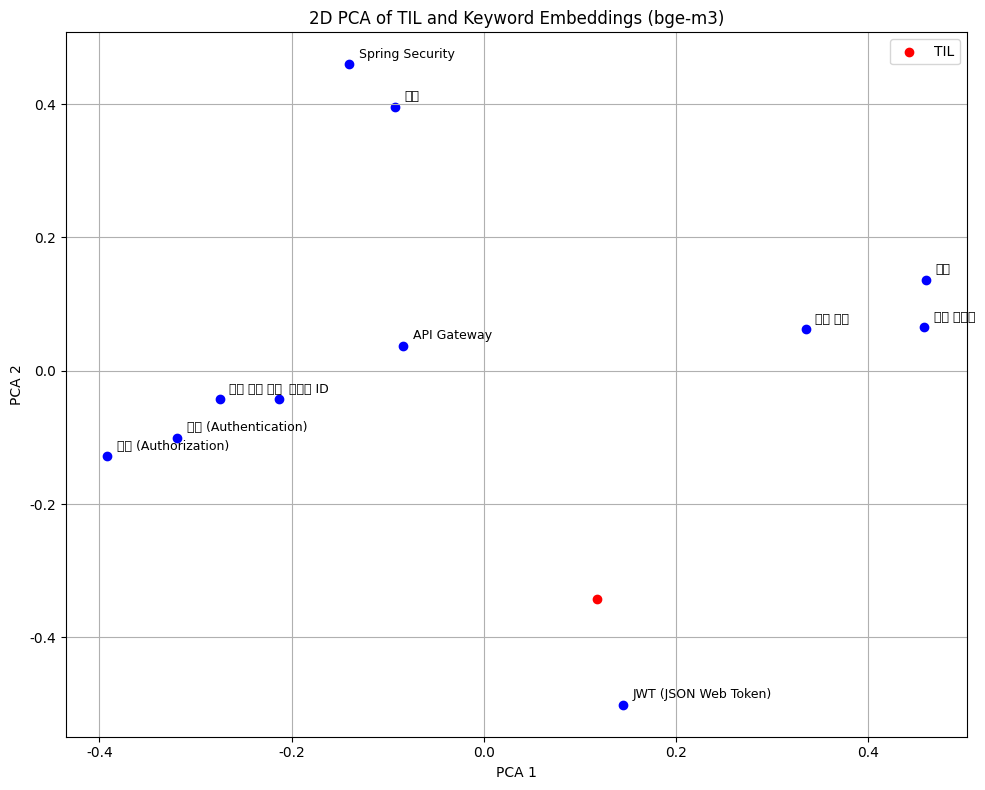

INFO 05-30 06:27:06 [loggers.py:87] Engine 000: Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Waiting: 0 reqs, GPU KV cache usage: 0.0%, Prefix cache hit rate: 0.0%
INFO 05-30 06:27:16 [loggers.py:87] Engine 000: Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 0.0 tokens/s, Running: 0 reqs, Waiting: 0 reqs, GPU KV cache usage: 0.0%, Prefix cache hit rate: 0.0%


In [14]:
import matplotlib as mpl

# 폰트 설정 (NanumGothic이 설치된 경우)
mpl.rcParams['font.family'] = 'DejaVu Sans'

# 마이너 경고 제거
mpl.rcParams['axes.unicode_minus'] = False

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

embeddings = model.encode([til] + parsed.keywords_list, normalize_embeddings=True)

# 4. 유사도 계산
til_embedding = embeddings[0]
keyword_embeddings = embeddings[1:]
similarities = np.dot(keyword_embeddings, til_embedding)  # (10,) 벡터

# 3. PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# 4. 시각화
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[0, 0], reduced_embeddings[0, 1], color='red', label='TIL')
for i, (x, y) in enumerate(reduced_embeddings[1:]):
    plt.scatter(x, y, color='blue')
    plt.text(x + 0.01, y + 0.01, parsed.keywords_list[i], fontsize=9)

plt.title("2D PCA of TIL and Keyword Embeddings (bge-m3)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()